In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Climate Analysis

In [10]:
##inspector code for analysis
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
session.query(Measurement.prcp).all()

[(0.08),
 (0.0),
 (0.0),
 (0.0),
 (None),
 (0.06),
 (0.0),
 (0.0),
 (0.0),
 (0.01),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.01),
 (0.0),
 (0.04),
 (0.12),
 (0.0),
 (None),
 (0.03),
 (0.01),
 (None),
 (0.01),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.02),
 (0.01),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (None),
 (0.03),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.01),
 (0.0),
 (0.0),
 (0.12),
 (0.08),
 (0.03),
 (0.0),
 (0.43),
 (0.06),
 (None),
 (0.0),
 (0.0),
 (0.0),
 (0.06),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (None),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.01),
 (0.17),
 (0.15),
 (0.27),
 (0.01),
 (0.0),
 (0.01),
 (0.0),
 (0.01),
 (0.01),
 (0.0),
 (0.0),
 (0.01),
 (0.0),
 (0.0),
 (0.0),
 (0.04),
 (0.01),
 (0.0),
 (0.02),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.03),
 (0.2),
 (0.08),
 (0.01),
 (0.0),
 (0.05),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.03),
 (0.0)

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results



#####################################################################################
##    Sets the query date to one year past the last date of entry, then
##    runs a query where the dates are all greater than or equal to that date.
##    Therefore, the last year of results.
#####################################################################################

date_str = '2017-08-23'
query_date = dt.date(2017,8,23)-dt.timedelta(days=365)

session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=query_date).all()


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column

last_year_prcp = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=query_date).statement
last_year_prcp_df = pd.read_sql(last_year_prcp, session.bind, index_col='date')
last_year_prcp_df

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [16]:
# Sort the dataframe by date
sorted = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=query_date).order_by(Measurement.date).statement
sorted_df = pd.read_sql(last_year_prcp, session.bind, index_col='date')
sorted_df

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


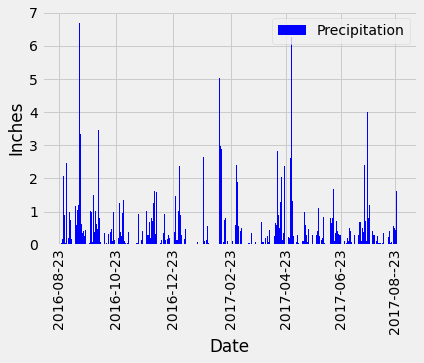

In [100]:
# Use Pandas Plotting with Matplotlib to plot the data
x_axis = sorted_df.index
y_axis = sorted_df.prcp

plt.bar(x_axis, y_axis, color='blue', label='Precipitation')
tick_locations = ['2016-08-23','2016-10-23','2016-12-23','2017-02-23','2017-04-23','2017-06-23','2017-08-23']
plt.xticks(tick_locations, ['2016-08-23','2016-10-23','2016-12-23','2017-02-23','2017-04-23','2017-06-23','2017-08--23'],rotation=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend()

In [34]:
mean = sorted_df.prcp.mean()
median = sorted_df.prcp.median()
mode = sorted_df.prcp.mode()
min = sorted_df.prcp.min()
max = sorted_df.prcp.max()
std = sorted_df.prcp.std()

In [36]:
# Use Pandas to calcualte the summary statistics for the precipitation data

print("Summary Statistics for Precipitation over the Last Year (in Inches)")
print(f"The mean is: {mean}")
print(f"The median is: {median}")
print(f"The mode is: {mode}")
print(f"The minimum is: {min}")
print(f"The maximum is: {max}")
print(f"The standard deviation is: {std}")



Summary Statistics for Precipitation over the Last Year (in Inches)
The mean is: 0.17727857496288996
The median is: 0.02
The mode is: 0    0.0
dtype: float64
The minimum is: 0.0
The maximum is: 6.7
The standard deviation is: 0.4611895038877028


In [41]:
# Design a query to show how many stations are available in this dataset? (One of Two)

session.query(Measurement.station).distinct().count()

9

In [37]:
# Design a query to show how many stations are available in this dataset?  (Two of Two)
session.query(Station.station).count()

9

In [85]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
#session.query(Table.column, func.count(Table.column)).group_by(Table.column).all()


########################################################################################################################
##    A Query for station as well as func.count of rows grouped by stations, then ordered by func.count descending.
########################################################################################################################


session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [89]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).all()

[('USC00519397', 53.0, 87.0, 73.09795396419437)]

In [90]:
# Choose the station with the highest number of temperature observations.
station_id_max = 'USC00519281'

In [93]:
# Query the last 12 months of temperature observation data for this station
session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.date>=query_date).filter(Measurement.station==station_id_max).all()

[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

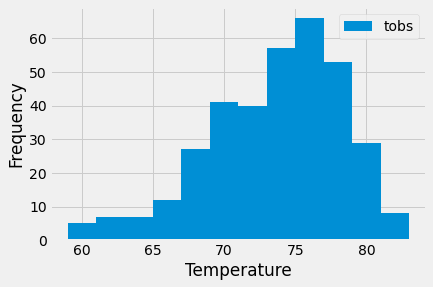

In [99]:
#plot the results as a histogram

stmt = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.date>=query_date).filter(Measurement.station==station_id_max).statement
histogram_df = pd.read_sql(stmt, session.bind)



x = histogram_df.tobs
plt.hist(x, bins = 12, label="tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.show()